In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from utils import GetCorrectPredCount, train, test
import model as myModel

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1407,), (0.4081,))
    ])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = myModel.Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}


In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
  test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.7824 Batch_id=117 Accuracy=32.62: 100%|███████████████████████████████████████████████████████████| 118/118 [02:25<00:00,  1.23s/it]


Test set: Average loss: 0.6925, Accuracy: 8155/10000 (81.55%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1043 Batch_id=117 Accuracy=90.52: 100%|███████████████████████████████████████████████████████████| 118/118 [02:18<00:00,  1.18s/it]


Test set: Average loss: 0.1350, Accuracy: 9646/10000 (96.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1174 Batch_id=117 Accuracy=95.52: 100%|███████████████████████████████████████████████████████████| 118/118 [02:17<00:00,  1.17s/it]


Test set: Average loss: 0.0988, Accuracy: 9728/10000 (97.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0885 Batch_id=117 Accuracy=96.69: 100%|███████████████████████████████████████████████████████████| 118/118 [02:07<00:00,  1.08s/it]


Test set: Average loss: 0.0642, Accuracy: 9842/10000 (98.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1055 Batch_id=117 Accuracy=97.23: 100%|███████████████████████████████████████████████████████████| 118/118 [02:07<00:00,  1.08s/it]


Test set: Average loss: 0.0553, Accuracy: 9861/10000 (98.61%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0997 Batch_id=117 Accuracy=97.69: 100%|███████████████████████████████████████████████████████████| 118/118 [01:23<00:00,  1.41it/s]


Test set: Average loss: 0.0509, Accuracy: 9859/10000 (98.59%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0519 Batch_id=117 Accuracy=97.96: 100%|███████████████████████████████████████████████████████████| 118/118 [01:19<00:00,  1.49it/s]


Test set: Average loss: 0.0411, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0214 Batch_id=117 Accuracy=98.25: 100%|███████████████████████████████████████████████████████████| 118/118 [01:18<00:00,  1.50it/s]


Test set: Average loss: 0.0374, Accuracy: 9896/10000 (98.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0116 Batch_id=117 Accuracy=98.31: 100%|███████████████████████████████████████████████████████████| 118/118 [01:20<00:00,  1.47it/s]


Test set: Average loss: 0.0419, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0300 Batch_id=117 Accuracy=98.43: 100%|███████████████████████████████████████████████████████████| 118/118 [01:25<00:00,  1.38it/s]


Test set: Average loss: 0.0353, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0200 Batch_id=117 Accuracy=98.51: 100%|███████████████████████████████████████████████████████████| 118/118 [01:19<00:00,  1.48it/s]


Test set: Average loss: 0.0348, Accuracy: 9903/10000 (99.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0326 Batch_id=117 Accuracy=98.66: 100%|███████████████████████████████████████████████████████████| 118/118 [01:19<00:00,  1.49it/s]


Test set: Average loss: 0.0427, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0414 Batch_id=117 Accuracy=98.75: 100%|███████████████████████████████████████████████████████████| 118/118 [01:15<00:00,  1.56it/s]


Test set: Average loss: 0.0296, Accuracy: 9907/10000 (99.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0067 Batch_id=117 Accuracy=98.78: 100%|███████████████████████████████████████████████████████████| 118/118 [01:16<00:00,  1.55it/s]


Test set: Average loss: 0.0325, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0138 Batch_id=117 Accuracy=98.88: 100%|███████████████████████████████████████████████████████████| 118/118 [01:17<00:00,  1.52it/s]


Test set: Average loss: 0.0318, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0060 Batch_id=117 Accuracy=99.07: 100%|███████████████████████████████████████████████████████████| 118/118 [01:22<00:00,  1.44it/s]


Test set: Average loss: 0.0246, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0241 Batch_id=117 Accuracy=99.12: 100%|███████████████████████████████████████████████████████████| 118/118 [01:19<00:00,  1.49it/s]


Test set: Average loss: 0.0239, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0346 Batch_id=117 Accuracy=99.13: 100%|███████████████████████████████████████████████████████████| 118/118 [01:18<00:00,  1.50it/s]


Test set: Average loss: 0.0236, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0253 Batch_id=117 Accuracy=99.16: 100%|███████████████████████████████████████████████████████████| 118/118 [01:18<00:00,  1.49it/s]


Test set: Average loss: 0.0237, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0202 Batch_id=117 Accuracy=99.13: 100%|███████████████████████████████████████████████████████████| 118/118 [01:16<00:00,  1.54it/s]


Test set: Average loss: 0.0242, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

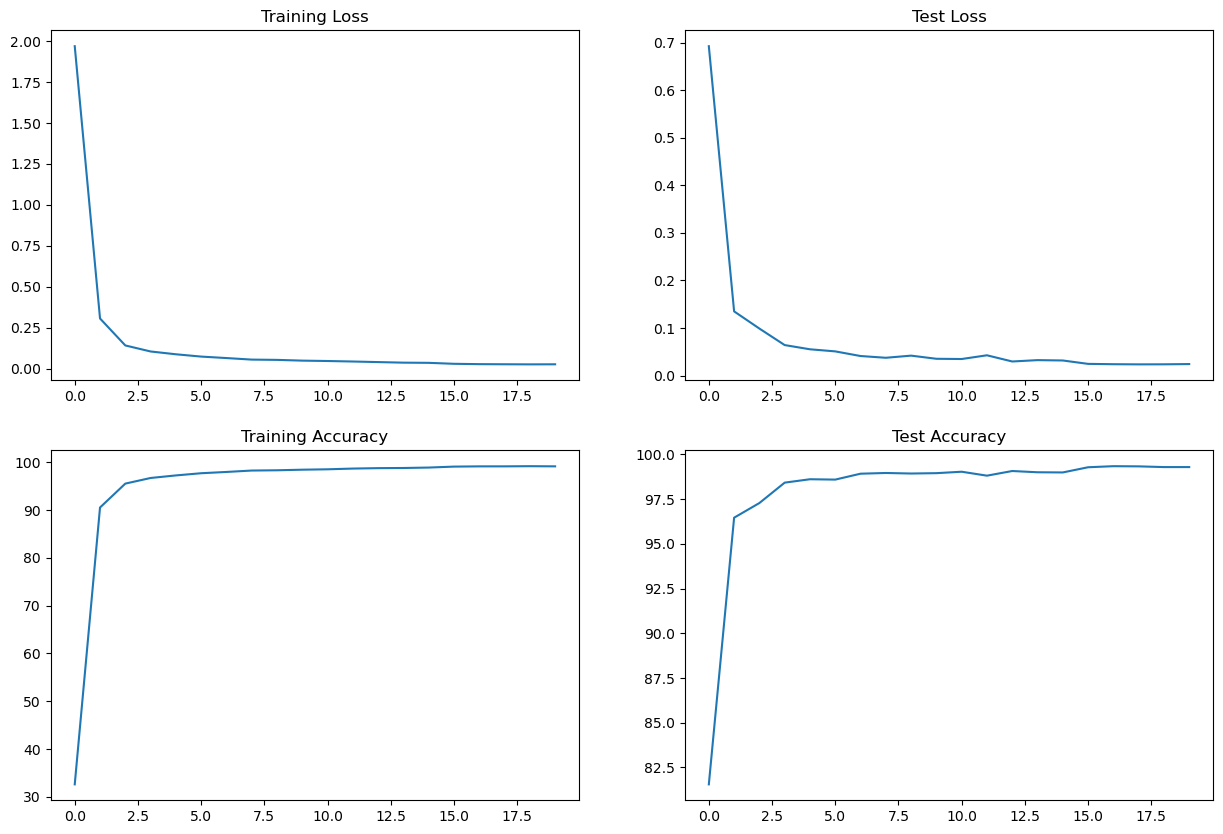

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")